<center>
<h1> MV LAB ASSIGNMENT 2 </h1>

Anirudh T, 21BAI1163
</center>

<center>

[LINK TO GITHUB REPOSITORY](https://github.com/OneTrueAnirudh/MV-LAB-2) 

</center>

In [125]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

# TASK-1: Geometric Rectification of Satellite Imagery

Objective: Correct the geometric distortions in satellite images using bilinear interpolation.

Materials: A distorted satellite image, ground control points (GCPs), and image processing software (such as Python with OpenCV). 

Steps:

- Import the distorted satellite image into the image processing software.

- Identify and mark ground control points (GCPs) on the distorted image.

- Define the corresponding coordinates for the GCPs in the rectified image.

- Apply a transformation matrix to map the distorted image to the corrected coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified image with the original image to evaluate the effectiveness of the 
rectification process.

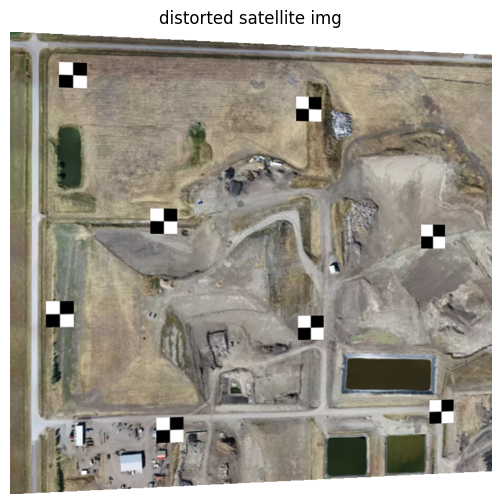

In [126]:
#load distorted satellite image
dist_img = cv2.imread('C:\Trial\MV\images\distorted_satellite_img.png')

#convert bgr to rgb for display in matplotlib
dist_img = cv2.cvtColor(dist_img, cv2.COLOR_BGR2RGB)

#display dist_image
plt.figure(figsize=(8, 6))
plt.imshow(dist_img)
plt.title('distorted satellite img')
plt.axis('off')
plt.show()

In [229]:
#identifying and marking GCPs on the distorted image

pts = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
cv2.namedWindow("satellite img")
cv2.setMouseCallback("satellite img", select_points)
while True:
    cv2.imshow("satellite img", dist_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
src_pts = np.array(pts,dtype=np.float32)
print("source points: ", src_pts)

source points:  [[ 99.  66.]
 [657. 316.]
 [670. 591.]
 [249. 619.]]


In [224]:
#define corresponding GCPs in rect_img (target geometry)
dst_pts = np.array([[75,60], [650,315], [675,630], [220,635]],dtype=np.float32)

In [225]:
#compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

print("transformation matrix:\n", M)

transformation matrix:
 [[ 9.08503125e-01 -5.65034470e-03 -1.58977761e+01]
 [-3.53394772e-02  9.81815215e-01 -7.29598499e+00]
 [-1.45428435e-04 -5.20817037e-05  1.00000000e+00]]


In [226]:
#get dims of dist_img
h, w = dist_img.shape[:2]

#apply transformation with bilinear interpolation
rect_img = cv2.warpPerspective(dist_img, M, (w, h), flags=cv2.INTER_LINEAR)

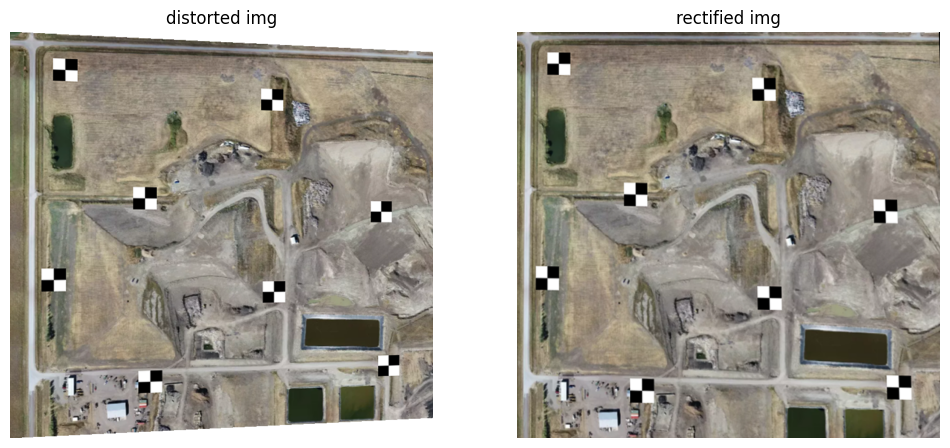

In [227]:
#side-by-side comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 2, 2)
plt.imshow(rect_img)
plt.axis('off')
plt.title('rectified img')

plt.show()

OBSERVATIONS:

- The process mentioned in the task description has been meticulously followed.

- A perspective-distorted satellite image with GCP markers is taken as input, and bilinear interpolation is used to correct the geometric distortion in the image, using the accurate positioning coordinates of the GCPs as reference points for applying the transformation matrix.

- Selecting the pixel coordinates of the GCPs in the distorted image is done via a manual point-and-click interface implemented using OpenCV. The distorted image appears in a window, and the user can click on the center of the required GCP marker. The position of the mouse click relative to the image is registered and the coordinates of the selected pixel is appended to a list of GCP marker coordinates.

- As the correct (un-distorted) coordinates of the GCP markers were not available, a trial-and-error method was used to identify the accurate reference coordinates of the GCP markers (used to calculate the transformation matrix).

- Using bilinear interpolation, the perspective distortion in the satellite image is rectified, and the corrected image is displayed.

# TASK-2: Medical Image Rectification

Objective: Rectify distortions in MRI images using bilinear interpolation. 

Materials: Distorted MRI images, reference anatomical model, and image processing software. 

Steps:

- Import the distorted MRI image into the image processing software.

- Identify and mark key points on the distorted MRI image.

- Obtain the corresponding coordinates from the reference anatomical model.

- Apply a transformation matrix to align the MRI image with the reference model.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified MRI image with the reference model to assess accuracy.

OBSERVATIONS:

# TASK-3: Drone Image Rectification

Objective: Correct the geometric distortions in drone-captured images of an agricultural field using bilinear interpolation. 

Materials: Distorted drone images, control points from known field locations, and image processing software. 

Steps:

- Import the distorted drone image into the image processing software.

- Identify and mark control points on the distorted image.

- Define the corresponding coordinates for the control points in the rectified image.

- Apply a transformation matrix to map the distorted image to the corrected coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Generate an orthophoto of the field and compare it with the original image.


OBSERVATIONS:

# TASK-4: Historical Photo Restoration

Objective: Rectify and restore old, distorted photographs using bilinear interpolation. 

Materials: Scanned old photographs, reference images, and image processing software. 

Steps:

- Import the scanned old photograph into the image processing software.

- Identify and mark key points on the distorted photograph.

- Obtain the corresponding coordinates from a reference image or known dimensions.

- Apply a transformation matrix to align the distorted photograph with the reference 
coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified photograph with the original scanned image and the reference image.


OBSERVATIONS:

# TASK-5: Architectural Image Rectification

Objective: Rectify perspective distortions in architectural images using bilinear interpolation. 

Materials: Distorted architectural images, known dimensions of the building, and image processing software. 

Steps:

- Import the distorted architectural image into the image processing software.

- Identify and mark key points on the distorted image corresponding to known dimensions of the building.

- Define the corresponding coordinates for these points in the rectified image.

- Apply a transformation matrix to align the distorted image with the known dimensions.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified image with the original distorted image to evaluate the correction.


OBSERVATIONS: